## Barras

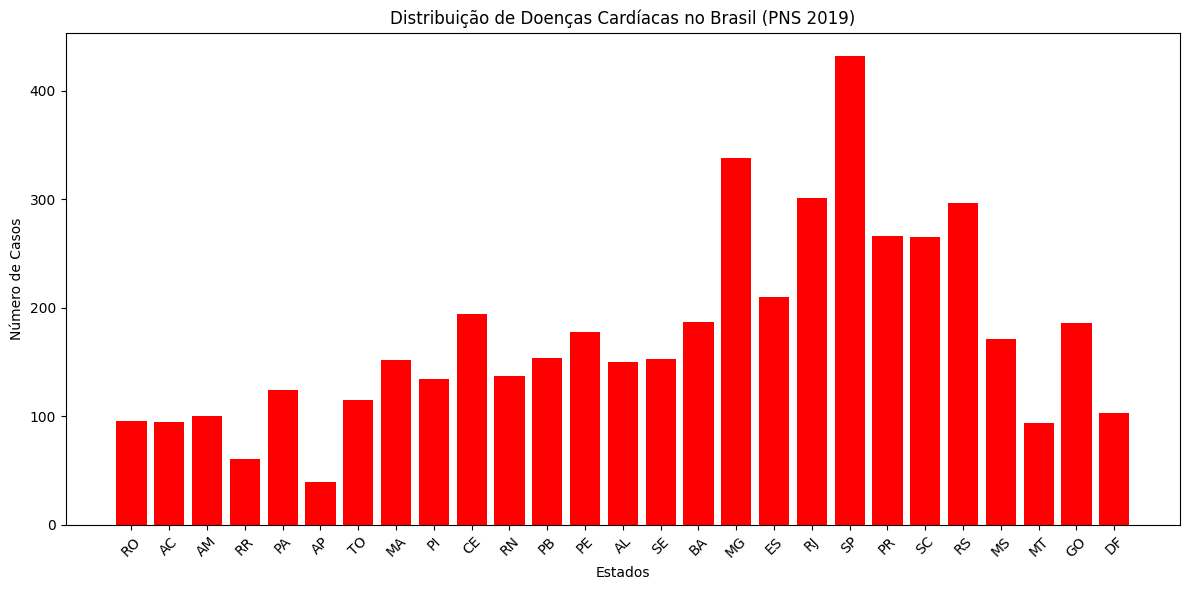

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados
colunas = ['V0001', 'Q06306']
base = pd.read_csv('../../Bases/Originais/pns2019.csv', usecols=colunas)

# 2. Filtrar e agrupar casos por estado
doenca_por_estado = base[base['Q06306'] == 1].groupby('V0001').size().reset_index(name='Casos')

# 3. Mapear códigos para siglas
codigos_uf = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO',
    21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL',
    28: 'SE', 29: 'BA', 31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP', 41: 'PR',
    42: 'SC', 43: 'RS', 50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'
}
doenca_por_estado['UF'] = doenca_por_estado['V0001'].map(codigos_uf)

# 4. Criar gráfico de barras simples
plt.figure(figsize=(12, 6))
plt.bar(doenca_por_estado['UF'], doenca_por_estado['Casos'], color='red')
plt.title('Distribuição de Doenças Cardíacas no Brasil (PNS 2019)')
plt.xlabel('Estados')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.tight_layout()

# 5. Salvar como PNG
plt.savefig('doencas_cardiacas.png', dpi=300)
plt.show()

## Coroplético

### Estados

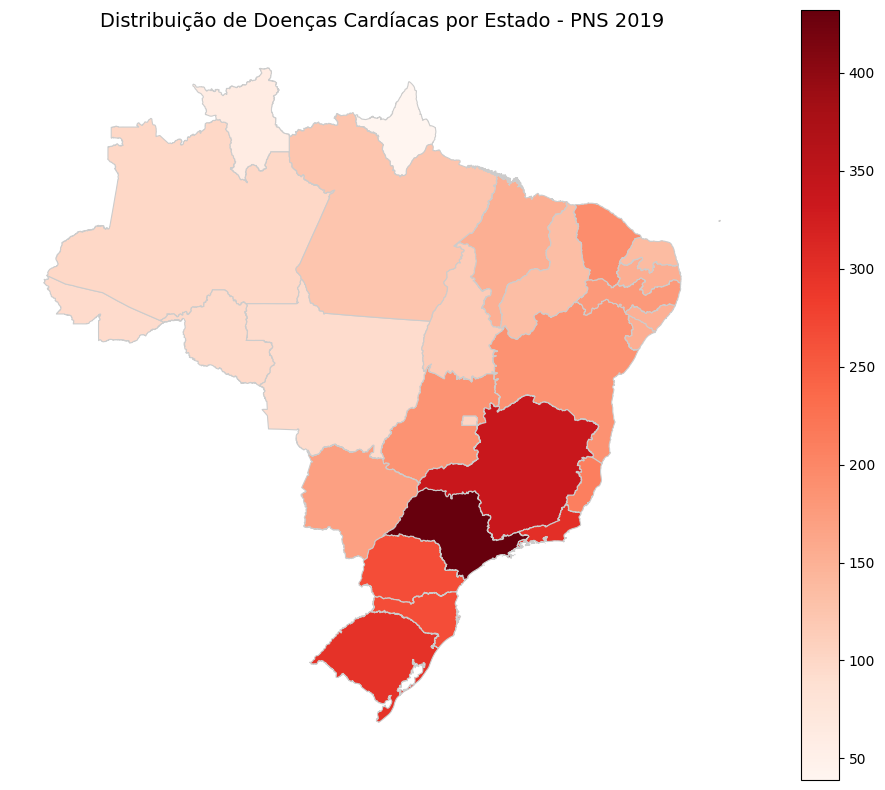

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Carregar os dados da PNS
colunas = ['V0001', 'Q06306']
base = pd.read_csv('../../Bases/Originais/pns2019.csv', usecols=colunas)

# 2. Filtrar e agrupar casos por estado
doenca_por_estado = base[base['Q06306'] == 1].groupby('V0001').size().reset_index(name='Casos')

# 3. Mapear códigos para nomes dos estados
codigos_uf = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}
doenca_por_estado['UF'] = doenca_por_estado['V0001'].map(codigos_uf)

# 4. Carregar o mapa GeoJSON
mapa = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# 5. Juntar os dados de casos com o mapa
mapa = mapa.merge(doenca_por_estado, how='left', left_on='name', right_on='UF')

# 6. Plotar o mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa.plot(column='Casos', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Distribuição de Doenças Cardíacas por Estado - PNS 2019', fontsize=14)
ax.axis('off')

# 7. Salvar o gráfico
# plt.savefig('mapa_doencas_cardiacas.png', dpi=300)

plt.show()

### Regiões

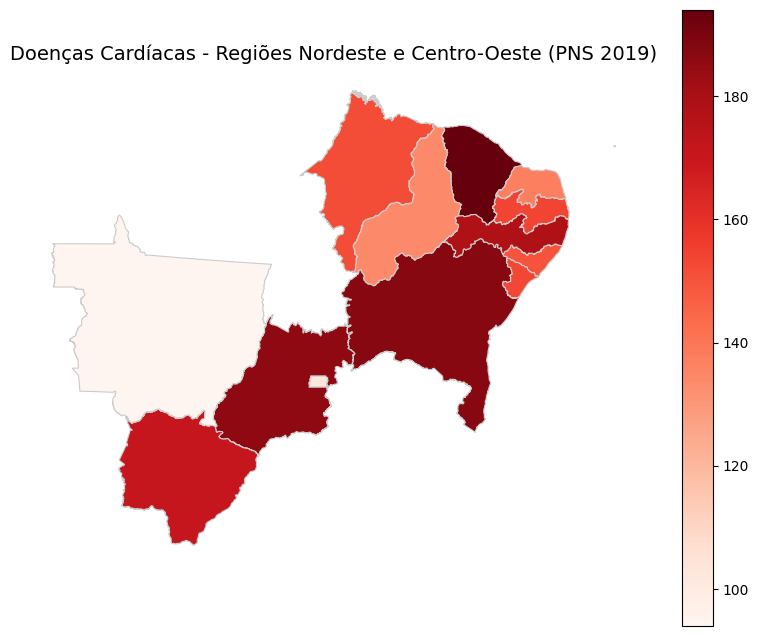

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Carregar os dados da PNS
colunas = ['V0001', 'Q06306']
base = pd.read_csv('../../Bases/Originais/pns2019.csv', usecols=colunas)

# 2. Filtrar e agrupar casos por estado
doenca_por_estado = base[base['Q06306'] == 1].groupby('V0001').size().reset_index(name='Casos')

# 3. Mapear códigos para nomes dos estados
codigos_uf = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro',
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul',
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}
doenca_por_estado['UF'] = doenca_por_estado['V0001'].map(codigos_uf)

# 4. Filtrar apenas para os estados desejados
nordeste = [
    'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 
    'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'
]
centro_oeste = [
    'Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal'
]
estados_desejados = nordeste + centro_oeste

doenca_por_estado = doenca_por_estado[doenca_por_estado['UF'].isin(estados_desejados)]

# 5. Carregar o mapa GeoJSON
mapa = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# 6. Filtrar o mapa também
mapa = mapa[mapa['name'].isin(estados_desejados)]

# 7. Juntar os dados
mapa = mapa.merge(doenca_por_estado, how='left', left_on='name', right_on='UF')

# 8. Plotar o mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mapa.plot(column='Casos', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Doenças Cardíacas - Regiões Nordeste e Centro-Oeste (PNS 2019)', fontsize=14)
ax.axis('off')

# 9. Salvar o gráfico
# plt.savefig('mapa_nordeste_centro_oeste.png', dpi=300)

plt.show()